In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from env import run_simulations, write_results, Env2048
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import norm

In [ ]:
results = run_simulations(num_processes=10, episodes_per_process=10000)

In [ ]:
write_results(results, path="data/stats-2.csv")

In [38]:
column_names = ["Max Tile", "Score", "Moves", "Last Points Scored", "Net Reward"]
df = pd.read_csv("data/stats-2.csv", names=column_names, header=None)

In [39]:
df = df[df['Max Tile'] != 512]

In [40]:
df.head()

,Max Tile,Score,Moves,Last Points Scored,Net Reward
0,64.0,456.0,58,16.0,-10.107875
1,128.0,1296.0,113,0.0,-21.424554
2,128.0,1480.0,127,8.0,-26.908153
3,128.0,1264.0,109,0.0,-23.460653
4,128.0,1164.0,97,16.0,-14.857992


In [41]:
df.describe()

,Max Tile,Score,Moves,Last Points Scored,Net Reward
count,99985.000000,99986.000000,99986.00000,99986.000000,99986.000000
mean,96.499275,893.650551,83.64481,6.278319,-12.531334
std,51.075641,460.915521,26.64499,9.758375,8.672612
min,8.000000,44.000000,21.00000,0.000000,-89.560820
25%,64.000000,548.000000,64.00000,0.000000,-17.310176
50%,64.000000,816.000000,80.00000,4.000000,-11.068766
75%,128.000000,1176.000000,101.00000,8.000000,-6.188059
max,256.000000,3492.000000,229.00000,256.000000,4.113372


In [42]:
tile_counts = df.groupby("Max Tile").size().reset_index(name="Count")

In [43]:
tile_counts

,Max Tile,Count
0,8.0,8
1,16.0,556
2,32.0,10227
3,64.0,42976
4,128.0,41172
5,256.0,5046


In [44]:
def plot_counts(tile_counts):

    x_positions = np.arange(len(tile_counts))

    colors = plt.cm.viridis(x_positions / len(tile_counts))

    plt.bar(x_positions, tile_counts['Count'], color=colors, width=0.6)

    plt.xticks(x_positions, tile_counts['Max Tile'], rotation=45)

    plt.xlabel('Max Tile')
    plt.ylabel('Count')
    plt.title('Count of Rows for Each Max Tile Value')
    plt.show()

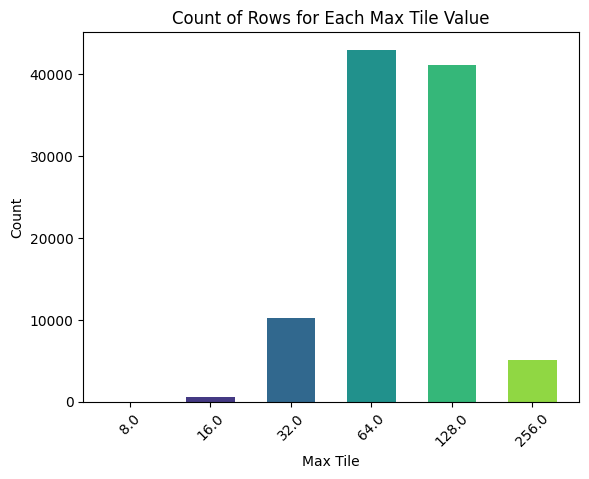

In [45]:
plot_counts(tile_counts)

In [46]:
mean_df = df.groupby("Max Tile")[["Score", "Moves"]].mean().reset_index()
var_df = df.groupby("Max Tile")[["Score", "Moves"]].var().reset_index()
std_df = df.groupby("Max Tile")[["Score", "Moves"]].std().reset_index()

In [47]:
mean_df

,Max Tile,Score,Moves
0,8.0,57.000000,22.875000
1,16.0,144.705036,32.717626
2,32.0,315.872103,47.652097
3,64.0,623.835629,69.279900
4,128.0,1171.126008,100.462547
5,256.0,2182.527943,147.425684


In [48]:
var_df

,Max Tile,Score,Moves
0,8.0,76.571429,1.839286
1,16.0,1203.047975,17.655256
2,32.0,5461.417633,49.802480
3,64.0,17618.519951,111.141922
4,128.0,40440.781090,204.665790
5,256.0,69339.768000,297.808054


In [49]:
std_df

,Max Tile,Score,Moves
0,8.0,8.750510,1.356203
1,16.0,34.684982,4.201816
2,32.0,73.901405,7.057087
3,64.0,132.734773,10.542387
4,128.0,201.098934,14.306145
5,256.0,263.324454,17.257116


In [61]:
def plot_distribution(mean_df, std_df, column, title):
    x_positions = np.arange(len(mean_df))
    
    plt.errorbar(x_positions, mean_df[column], yerr=std_df[column], fmt='o', capsize=5)
    
    plt.xticks(x_positions, mean_df['Max Tile'], rotation=45)
    
    plt.xlabel('Max Tile')
    plt.ylabel(column)
    plt.title(title)
    plt.show()

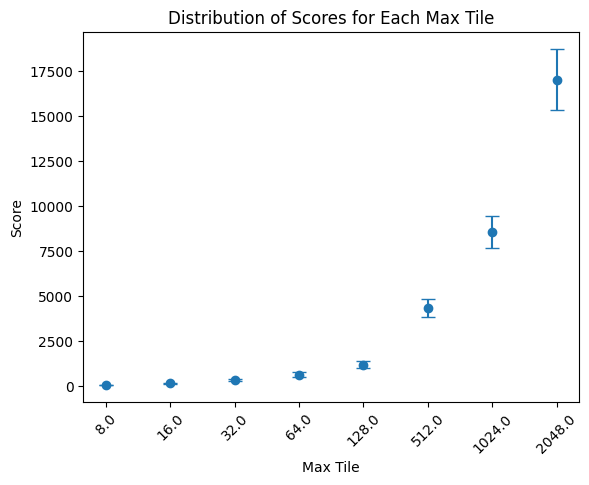

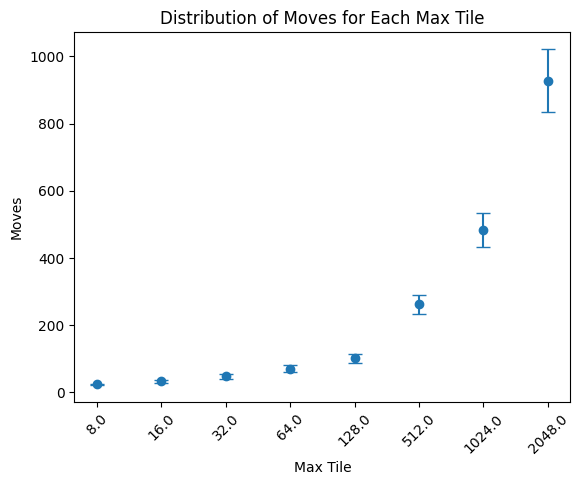

In [62]:
plot_distribution(mean_df, std_df, "Score", "Distribution of Scores for Each Max Tile")
plot_distribution(mean_df, std_df, "Moves", "Distribution of Moves for Each Max Tile")

In [52]:
def plot_normal_distribution(mean_df, std_df, max_tile_value, column, title):
    mean_value = mean_df.loc[mean_df["Max Tile"] == max_tile_value, column].values[0]
    std_value = std_df.loc[std_df["Max Tile"] == max_tile_value, column].values[0]
    x = np.linspace(mean_value - 4*std_value, mean_value + 4*std_value, 1000)
    y = norm.pdf(x, mean_value, std_value)
    
    plt.plot(x, y)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title(title)
    plt.show()

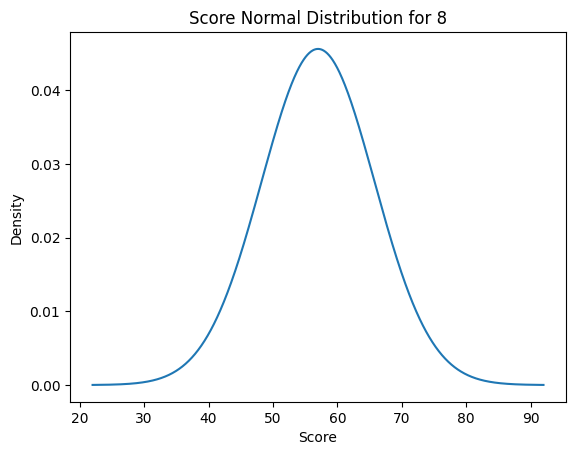

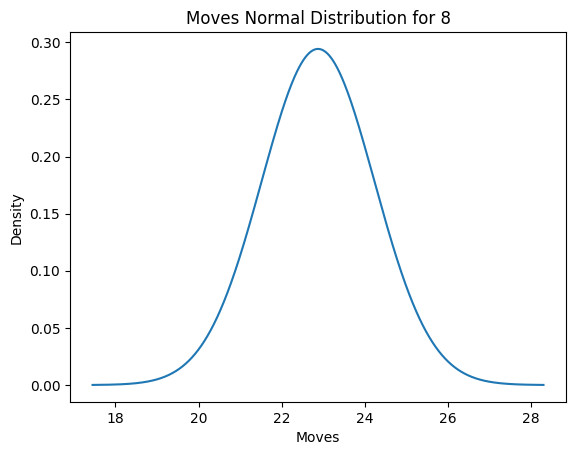

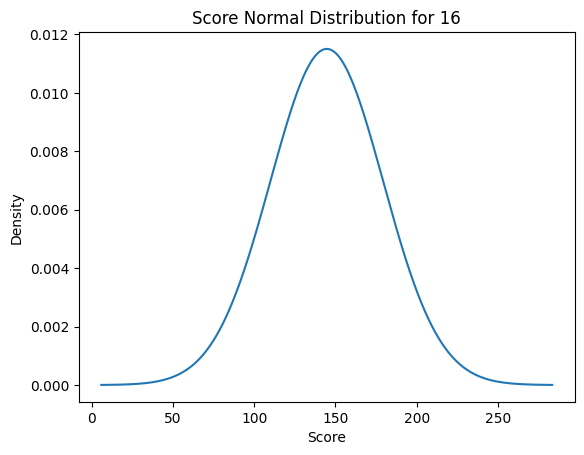

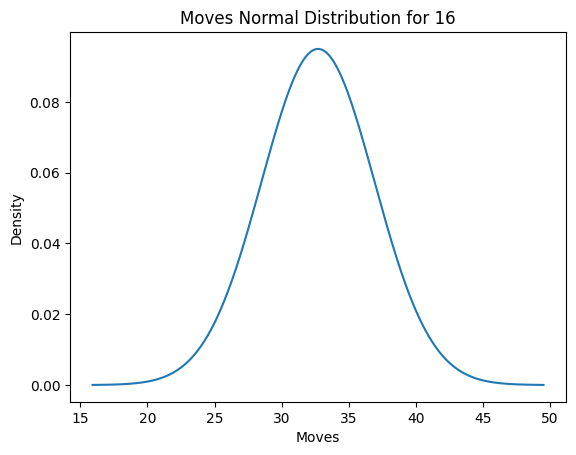

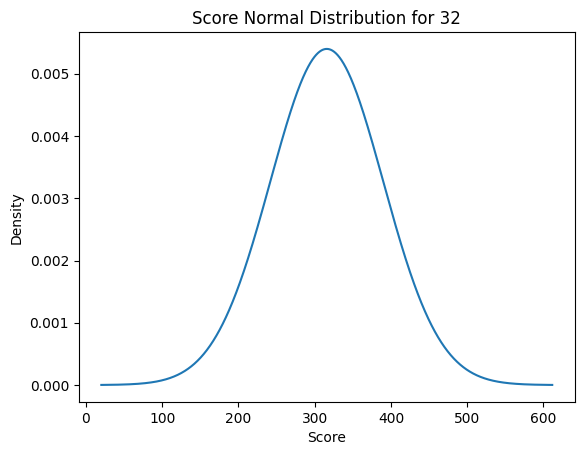

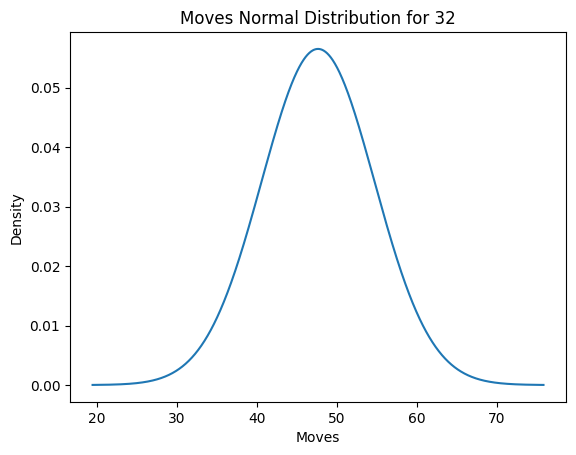

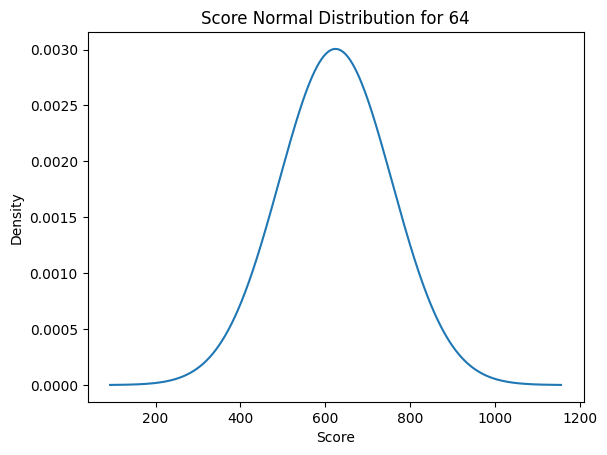

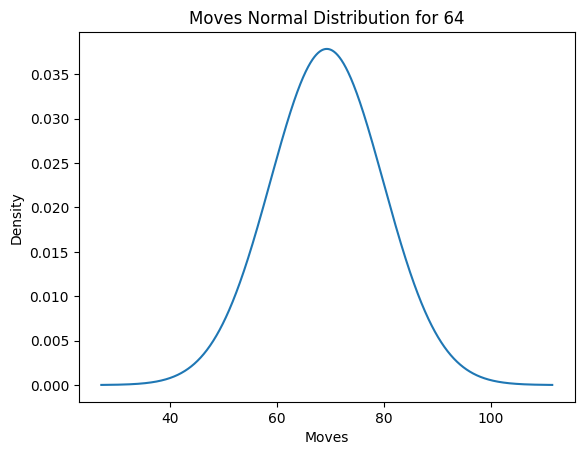

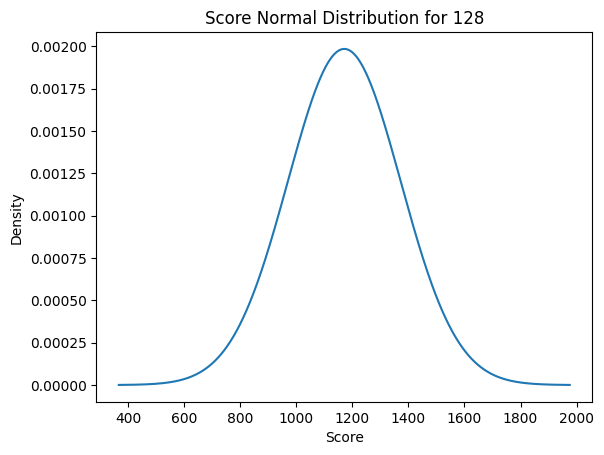

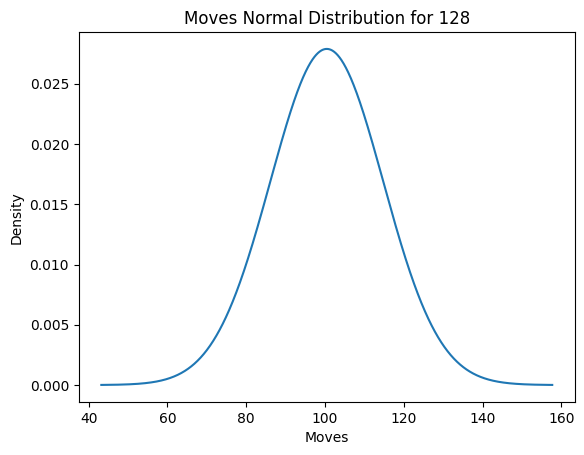

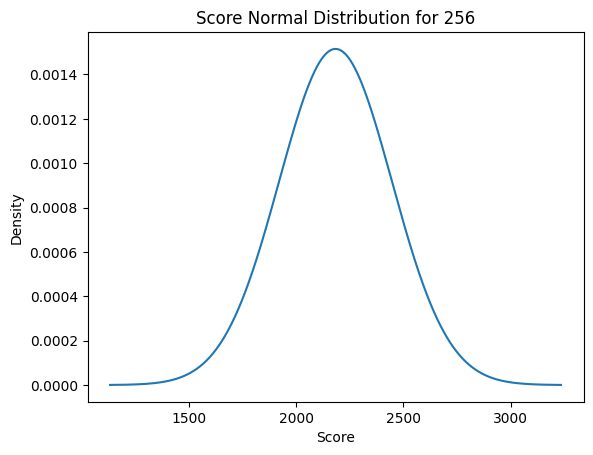

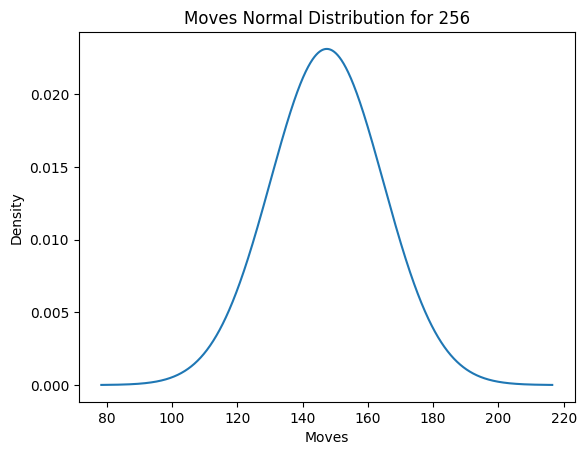

In [53]:
tiles = [8, 16, 32, 64, 128, 256]
for tile in tiles:
    plot_normal_distribution(mean_df, std_df, tile, "Score", f"Score Normal Distribution for {tile}")
    plot_normal_distribution(mean_df, std_df, tile, "Moves", f"Moves Normal Distribution for {tile}")

In [54]:
data = mean_df.copy()
data['Score Std'] = std_df['Score']
data['Moves Std'] = std_df['Moves']

X = data[['Max Tile']]
y = data[['Score', 'Moves', 'Score Std', 'Moves Std']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
new_max_tiles = [[512], [1024], [2048]]
predictions = model.predict(new_max_tiles)
print(f"Prediction: {predictions}")

Prediction: [[ 4315.08013036   261.38065073   480.4653989     28.93496655]
 [ 8549.18913871   483.6508137    888.89055168    50.67443784]
 [17017.40715542   928.19113962  1705.74085725    94.15338042]]


c:\Users\Andre\OneDrive\Documents\Repositories\2048\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
for i, (max_tile, data) in enumerate(zip(new_max_tiles, predictions)):
    i += 5
    mean_df.loc[i] = list(max_tile) + list(data[:2])
    std_df.loc[i] = list(max_tile) + list(data[2:])

In [57]:
mean_df

,Max Tile,Score,Moves
0,8.0,57.000000,22.875000
1,16.0,144.705036,32.717626
2,32.0,315.872103,47.652097
3,64.0,623.835629,69.279900
4,128.0,1171.126008,100.462547
5,512.0,4315.080130,261.380651
6,1024.0,8549.189139,483.650814
7,2048.0,17017.407155,928.191140


In [58]:
std_df

,Max Tile,Score,Moves
0,8.0,8.750510,1.356203
1,16.0,34.684982,4.201816
2,32.0,73.901405,7.057087
3,64.0,132.734773,10.542387
4,128.0,201.098934,14.306145
5,512.0,480.465399,28.934967
6,1024.0,888.890552,50.674438
7,2048.0,1705.740857,94.153380


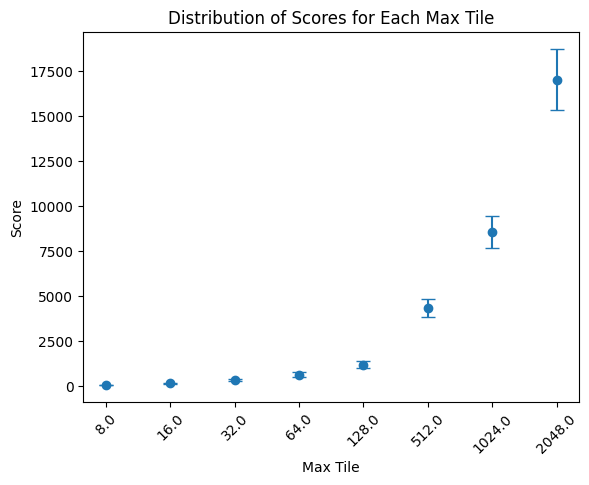

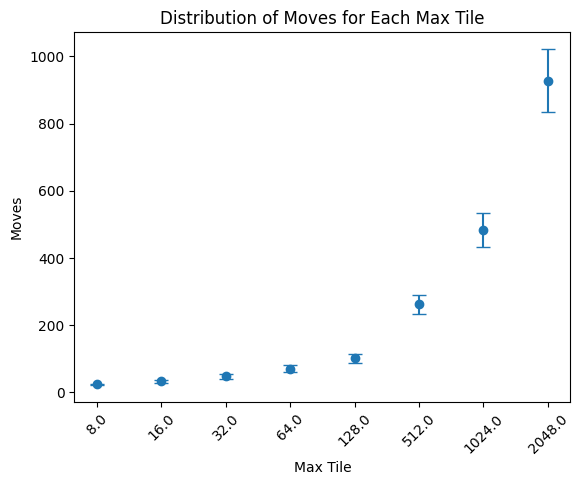

In [59]:
plot_distribution(mean_df, std_df, 'Score', 'Distribution of Scores for Each Max Tile')
plot_distribution(mean_df, std_df, 'Moves', 'Distribution of Moves for Each Max Tile')

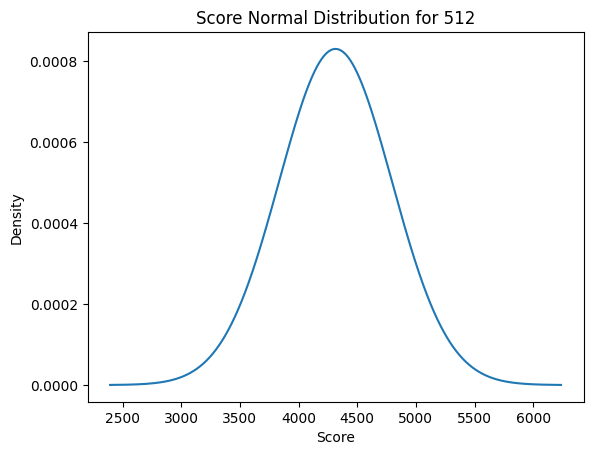

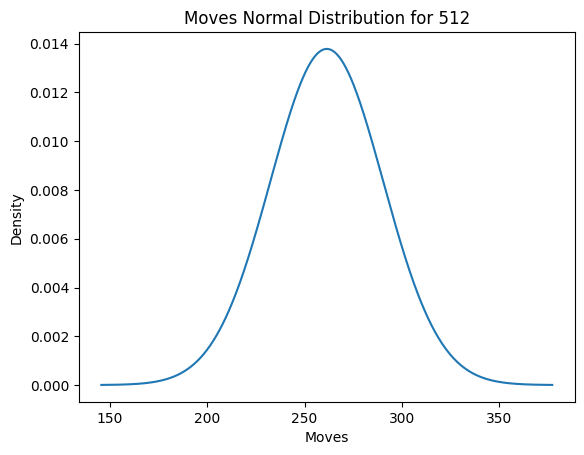

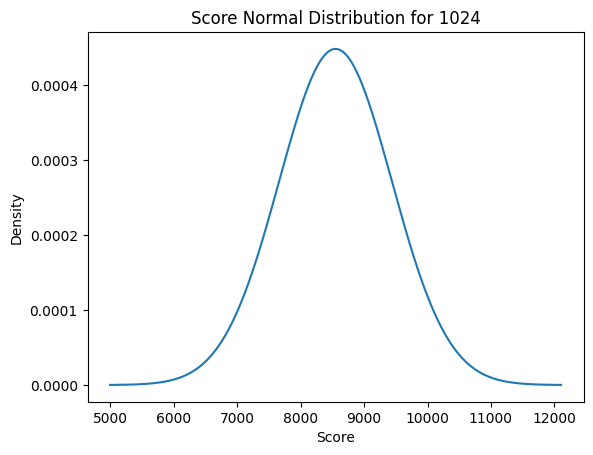

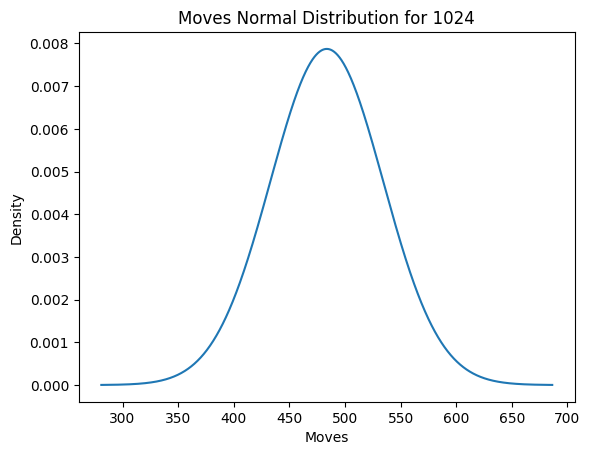

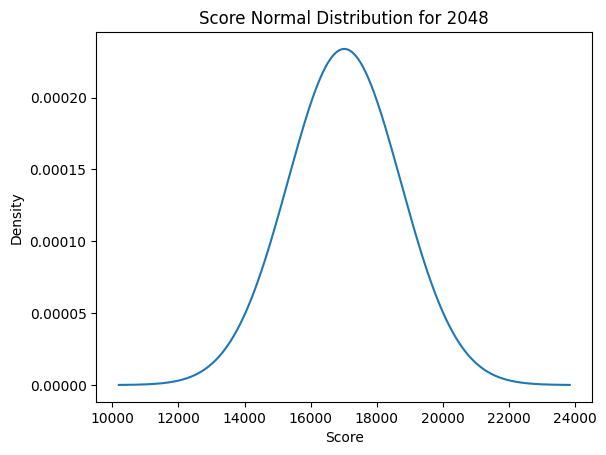

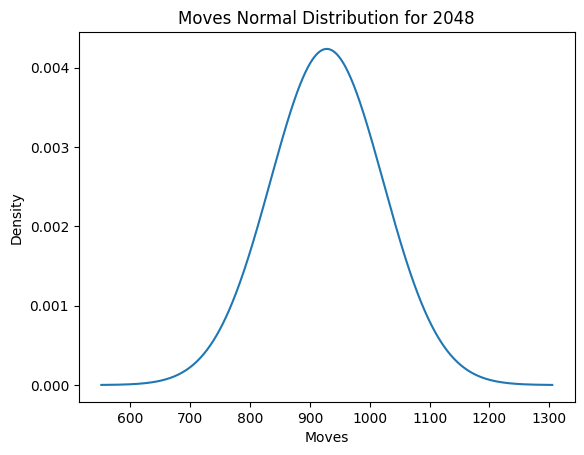

In [60]:
tiles = [512, 1024, 2048]
for tile in tiles:
    plot_normal_distribution(mean_df, std_df, tile, "Score", f"Score Normal Distribution for {tile}")
    plot_normal_distribution(mean_df, std_df, tile, "Moves", f"Moves Normal Distribution for {tile}")

In [67]:
from collections import defaultdict


def generate_test_sample(mean_df, std_df, tile):

    data = defaultdict(list)
    points_scored = [num for num in range(0, tile + 1, 2)]
    
    for column in mean_df.columns:
        mean = mean_df.loc[mean_df["Max Tile"] == tile, column].values[0]
        std = std_df.loc[std_df["Max Tile"] == tile, column].values[0]
        low = mean - std 
        high = mean + std + 1e-9
        data[tile].append(np.random.uniform(low, high))

    data[tile].append(np.random.choice(points_scored))
    data[tile].append(True)
    return data

In [68]:
generate_test_sample(mean_df, std_df, tile=64)

defaultdict(list,
            {64: [28.95416021584999,
              711.0081863045659,
              75.5078621486486,
              44,
              True]})